# What is Pandas?

- Pandas is one of the most popular Python libraries for Data Science and Analytics. I like to say it’s the "SQL of Python." Why? Because pandas helps you to manage two-dimensional data tables in Python.

- Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

- We'll be using it for importing data, or loading the data as a data frame in Python

More details could be found [here](https://pandas.pydata.org/)

In [1]:
import numpy as np # Import Numpy for data statistical analysis 
# Numpy is the fundamental package for scientific computing with Python
import pandas as pd # Import Pandas for data manipulation using dataframes

import matplotlib.pyplot as plt
%matplotlib inline
import re
import json
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import collections
import itertools
from nltk import bigrams
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("white")

# How to open data files in pandas?
You might have your data in .csv files or SQL tables. Maybe Excel files. Or .tsv files. Or something else. But the goal is the same in all cases. If you want to analyze that data using pandas, the first step will be to read it into a data structure that's compatible with pandas.



## Pandas data structures
There are two types of data structures in pandas: Series and DataFrames.
- **Series**: a pandas Series is a one dimensional data structure ("a one dimensional ndarray") that can store values — and for every value it holds a unique index, too.
- **DataFrame**: a pandas DataFrame is a two (or more) dimensional data structure – basically a table with rows and columns. The columns have names and the rows have indexes.

## 1. Loading a .csv file in pandas DataFrame

In [2]:
talabat_df = pd.read_json('COVID.json')
##Convert str date to datetime type
## pd.to_datetime(df)

In [3]:
##Removing the followers column ####
talabat_df = talabat_df.drop(columns = ['Followers'],axis = 0)

KeyError: "['Followers'] not found in axis"

# Filtering and cleaning the tweets

In [4]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

for index,row in talabat_df.iterrows():
    talabat_df.at[index,'Text'] = re.sub("@[A-Za-z0-9]+","",(row['Text']))
for index,row in talabat_df.iterrows():
    talabat_df.at[index,'Text'] = remove_url(row['Text'])
for index,row in talabat_df.iterrows():
    talabat_df.at[index,'Text'] = re.sub("[.!?\\-]+","",(row['Text']))
#Converting each text string into lower case
for index,row in talabat_df.iterrows():
    talabat_df.at[index,'Text'] = row['Text'].lower()
talabat_df["Character Count"]=talabat_df.Text.apply(len)
talabat_df

,Text,Likes_count,Retweet_count,Date created,Character Count
0,as much as i hate talabat and cant wait for th...,0,0,2020-07-12 14:22:23,111
1,uber bitch thats talabat n its not working bec...,0,0,2020-07-12 12:57:30,59
2,no matter the company or the individuals actio...,0,0,2020-07-12 12:37:39,83
3,what the hell,0,0,2020-07-12 12:28:35,13
4,why when contactless delivery is requested it ...,0,0,2020-07-12 12:19:56,97
...,...,...,...,...,...
212,spent only 20 min waiting for my food ordering...,0,0,2020-07-08 18:59:02,69
213,catch fish without leaving home sure we delive...,1,0,2020-07-08 15:00:00,61
214,im so sorry about that if this hasnt been reso...,0,0,2020-07-08 14:31:53,98
215,hi ae why do you make it impossible to change ...,1,0,2020-07-08 14:19:08,108


# Getting tweets sentiments

In [5]:
# Create textblob objects of the tweets
def sentiment_check(value):
    if(value < 0):
        return "Negative"
    else:
        return "Positive"
    
tweet_list = []
sentiment_values_neutral = []
for index,row in talabat_df.iterrows():
    tweet_list.append(row['Text'])
sentiment_objects = [TextBlob(tweet) for tweet in tweet_list]
sentiment_values = [tweet.sentiment.polarity for tweet in sentiment_objects]
talabat_df['Polarity'] = sentiment_values
talabat_df['Polarity'].describe()
#Checking without neutral polarity (or polarity of 0)
neutral_df = talabat_df[talabat_df.Polarity !=0]

#Creating a new Sentiment column having values 'Positive' or 'Negative'
neutral_df['Sentiment'] = neutral_df.Polarity.apply(sentiment_check)
neutral_df
#talabat_df['Polarity'].describe()

,Text,Likes_count,Retweet_count,Date created,Character Count,Polarity,Sentiment
0,as much as i hate talabat and cant wait for th...,0,0,2020-07-12 14:22:23,111,-0.250000,Negative
5,why does most of my talabat drivers call me th...,0,0,2020-07-12 12:14:42,77,0.392857,Positive
6,j1993 sounds like you should shut the fuck up,0,0,2020-07-12 11:32:08,45,-0.400000,Negative
7,how about save resturant as favorite button i ...,0,0,2020-07-12 09:52:45,91,0.500000,Positive
8,nln nabeel if a companys service is continuous...,0,0,2020-07-12 08:08:17,96,-0.138462,Negative
...,...,...,...,...,...,...,...
212,spent only 20 min waiting for my food ordering...,0,0,2020-07-08 18:59:02,69,-0.050000,Negative
213,catch fish without leaving home sure we delive...,1,0,2020-07-08 15:00:00,61,0.500000,Positive
214,im so sorry about that if this hasnt been reso...,0,0,2020-07-08 14:31:53,98,-0.500000,Negative
215,hi ae why do you make it impossible to change ...,1,0,2020-07-08 14:19:08,108,-0.583333,Negative


# Calculating word frequency

In [6]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.split() for tweet in tweet_list]
#removing stopwords
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


#removing collection words
collection_words = ['talabat', 'zomato', 'carriage','order','us','hello','customers','outdoor']
tweets_ncw_nsw = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]


###### This part is temporary...might delete it later #######
irrelevant_words = ['please','dm','customer','number','sorry','priority','tell','apologize']
tweets_final = [[w for w in word if not w in irrelevant_words]
                 for word in tweets_ncw_nsw]


# Flatten list of words in clean tweets
all_tweets_ncw_nsw = list(itertools.chain(*tweets_final))

# Create counter of words in clean tweets
counts_nsw_ncw = collections.Counter(all_tweets_ncw_nsw)

counts_nsw_ncw.most_common(15)

clean_tweets_ncw = pd.DataFrame(counts_nsw_ncw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw



,words,count
0,service,28
1,send,18
2,inconvenience,16
3,delivery,15
4,provide,15
5,app,14
6,online,14
7,food,12
8,catering,12
9,thank,10


Text(0.5, 1.0, 'Common Words Found in Tweets (Without Stop or Collection Words)')

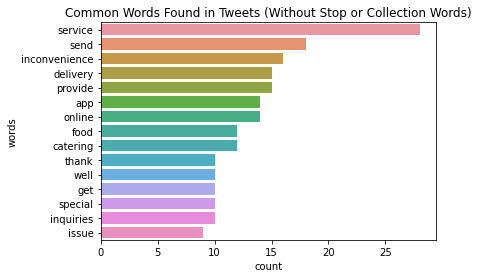

In [7]:
#Plotting most frequent words as a bar graph
ax = sns.barplot(x="count", y="words", orient='h', data=clean_tweets_ncw)
ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

# Creating a histogram of polarity without netural ones

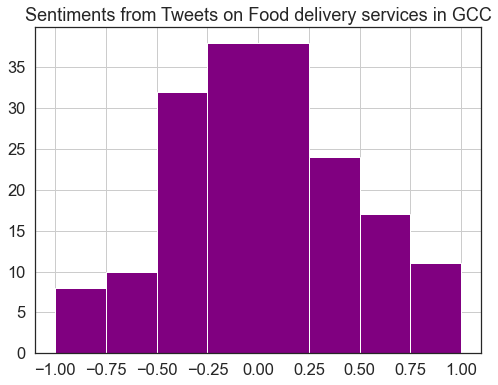

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
neutral_df['Polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Food delivery services in GCC")
plt.show()

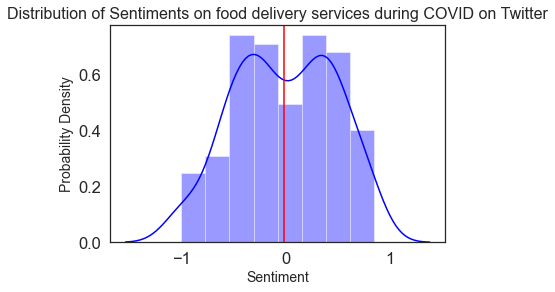

In [8]:
neutral_df = neutral_df[neutral_df.Polarity != 0]
x = neutral_df.Polarity # array with revenues only
sns.set_style("white")
sns.distplot(x, color = 'blue', bins=8); # distplot stands for distribution plot
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.title("Distribution of Sentiments on food delivery services during COVID on Twitter", fontsize=16)
plt.xlabel("Sentiment", fontsize=14) 
plt.ylabel("Probability Density", fontsize=14)  
plt.xticks([-1,0,1])
# plt.yticks([])
# x.set_facecolor('white')

# Calculating the mean
mean = neutral_df['Polarity'].mean()

#ploting the mean using matplotlib
plt.axvline(mean, color = 'red') # axvline: Axis Vertical Line

In [9]:
mean

-0.01014202067773495

In [30]:
#getting co-relation 
neutral_df['Polarity'].corr(neutral_df['Likes_count'])

0.06906049811180293

In [25]:
# Create list of lists containing bigrams in tweet
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_final]
    

#Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
bigram_df


,bigram,count
0,"(online, catering)",12
1,"(catering, inquiries)",10
2,"(inconvenience, provide)",9
3,"(send, mobile)",7
4,"(top, problem)",6
5,"(problem, faced)",6
6,"(provide, id)",5
7,"(id, phone)",5
8,"(faced, well)",5
9,"(well, best)",5


# visualizing bigrams

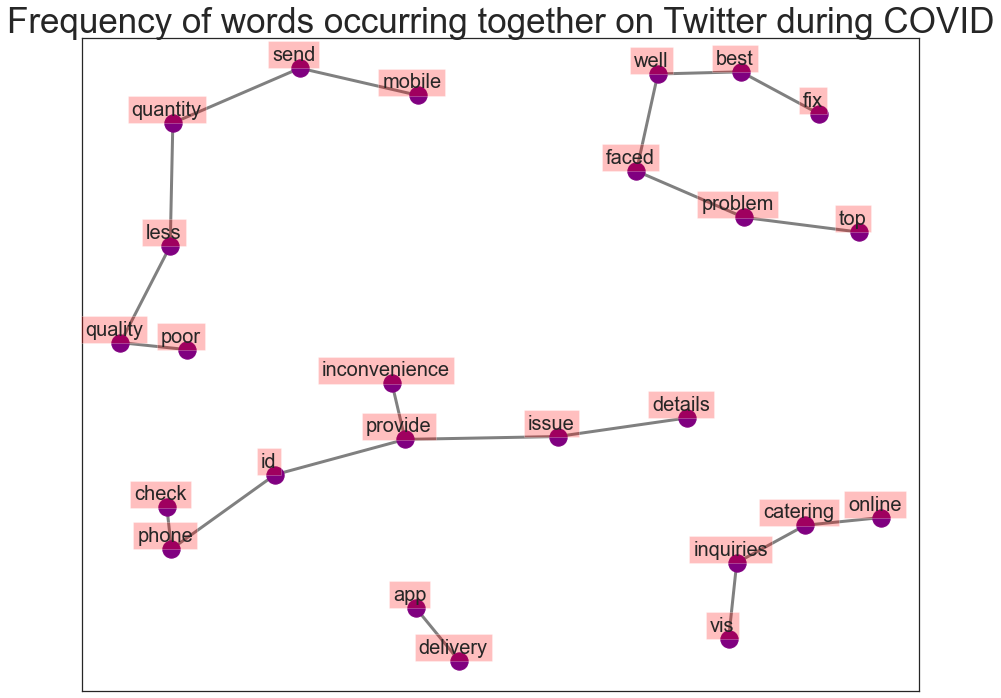

In [81]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


# Draw the network using NetworkX and matplotlib
fig, ax = plt.subplots(figsize=(15, 12))
pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)
plt.title("Frequency of words occurring together on Twitter during COVID", fontsize=35)

# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_facecolor('white')
# Create offset labels
for key, value in pos.items():
    x, y = value[0]-0.015, value[1]+0.025
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
        horizontalalignment='center', fontsize=20)
    
plt.show()

# Visualizing Heatmaps

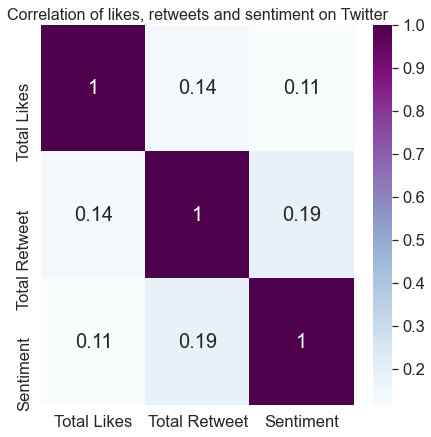

In [38]:
# First Calculate the pairwise correlation for the columns containing numeric values and save it in a dataframe
pc_df = neutral_df[['Likes_count','Retweet_count','Polarity']].corr(method ='pearson')
cols = ['Total Likes','Total Retweet','Sentiment',]
# sns.set(rc={'figure.figsize':(7,7)})
plt.title("Correlation of likes, retweets and sentiment on Twitter", fontsize=16)

ax = sns.heatmap(pc_df, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 20},
                 cmap="BuPu")
# sns.set(rc={'figure.figsize':(10,10)})


# Visualizing Scatter Plots

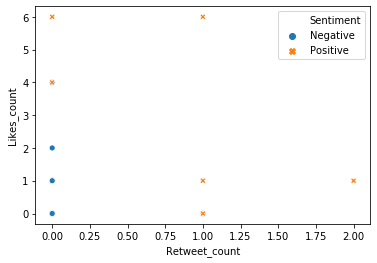

In [13]:
ax = sns.scatterplot(x="Retweet_count", y="Likes_count", data=neutral_df, color = 'green', hue = 'Sentiment', style = 'Sentiment')

# visualizing Line graphs

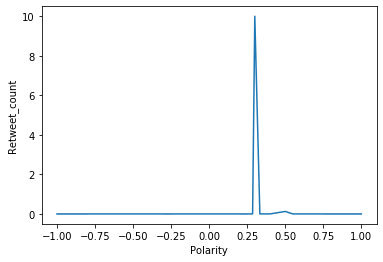

In [88]:
ax = sns.lineplot(x='Polarity', y='Retweet_count', data = neutral_df, ci=False)

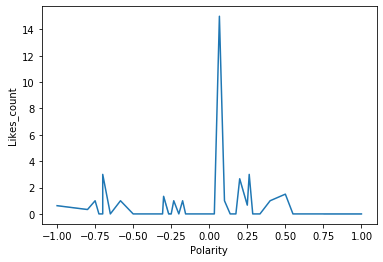

In [20]:
ax = sns.lineplot(x='Polarity', y='Likes_count', data = neutral_df, ci=False)

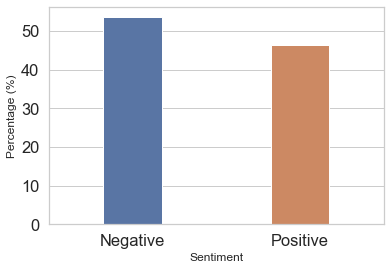

In [13]:
sentiment_p = neutral_df['Polarity'].value_counts(normalize=True, bins=2)*100

sentiment_np_df = sentiment_p.to_frame()
sentiment_np_df['Sentiment'] = ["Negative", "Positive"]


fig, ax = plt.subplots()

sns.barplot(x="Sentiment", y="Polarity", data=sentiment_np_df, ax=ax)
plt.xlabel("Sentiment", fontsize=12)  
plt.ylabel("Percentage (%)", fontsize=12)
# plt.title("Distribution of Sentiments on food delivery services During COVID", fontsize=15)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
    
plt.show()

In [14]:
sentiment_np_df

,Polarity,Sentiment
"(-0.075, 0.85]",53.571429,Negative
"(-1.003, -0.075]",46.428571,Positive


## 2. Print a sample of your dataframe

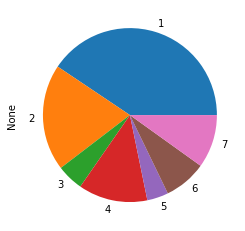

In [15]:
zoo_df.groupby('class_type').size().plot(kind='pie')

## Grouping in pandas


Data Analysts or Scientists do segmentations all the time. For instance, it's nice to know the mean length of all reviews (we have just learned that it's 132.05). But very often it's much more actionable to break this number down – let's say – by rating. With that, we can compare the instances to each other – or we can find outliers.

In [ ]:
alexa_df.groupby('rating').mean()[['length']]
alexa_df.groupby('rating').min()[['length']]
alexa_df.groupby('rating').max()[['length']]

In [ ]:
#Percentage of people who liked and disliked Alexa.
alexa_df.groupby("feedback").rating.count().plot(kind="pie",shadow=True, autopct='%1.1f%%',explode=(0.1,0.1));

In [ ]:
#Who expressed their feelings better. Either sad people or happy people?
alexa_df.groupby("feedback").length.mean().plot(kind='bar')
plt.title("Average word length by both happy and unhappy people")


Seems like unhappy people expressed with more words

In [ ]:
alexa_df.groupby("rating").length.mean().plot(kind="bar",  colormap='Paired');
plt.title("rating vs length");

In [ ]:
#Ratings distribution
alexa_df.groupby("rating").feedback.count().plot(kind="pie",shadow=True,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1))

In [ ]:
alexa_df.groupby('rating').length.describe()


Ok so people are happy about it!

Let us visualize some words which people use for expressing positive as well as negative reviews


In [ ]:
!pip install wordcloud

In [ ]:
#Positive words
# Generate the list of positove words from positive feedback
good_word_list=alexa_df[alexa_df.feedback==1].verified_reviews.unique().tolist()
# join all the words in one sequence, as wordcloud takes a sequence of words as input and not a list
good_words=" ".join(good_word_list)
# import wordcloud
from wordcloud import WordCloud
# generate the word clouds
wc=WordCloud().generate(good_words)
# plot the wordcloud using matplotlib
plt.figure(figsize=(10,8))
plt.imshow(wc)
